# Dental Caries detection
### Using image of teeth from smartphone of user, predict if there is any tooth having caries

Steps:
1. Collect Data
2. Label Data manually -> Labelimg (YOLO format) `pip install labelimg`
3. Augment Data        -> imgaug/ attached script `git clone https://github.com/dnissimi/imgaug-yolov3`
4. Train
    1. Object Detector -> YOLOv3 (clone darknet repo)
    2. Convert trained weights to keras format (Code below)
    2. Classifier       -> On cropped image using object detector using Resnet50

## Training YOLOv3 (Use colab)

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# clone darknet repo, used for YOLO
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14476 (delta 5), reused 10 (delta 5), pack-reused 14460
Receiving objects: 100% (14476/14476), 13.20 MiB | 15.42 MiB/s, done.
Resolving deltas: 100% (9837/9837), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

Mount google drive to access the train data
store the train data, config files etc in 'yolov3' folder in root of gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive/yolov3

Mounted at /content/drive
 age_images			 Multiskin	 yolov3
'age_new model'			'My Drive'	 yolov3_teeth1.ipynb
 app-uat-universal-release.apk	 unified_model
'Colab Notebooks'		 Uni_model_Aug


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

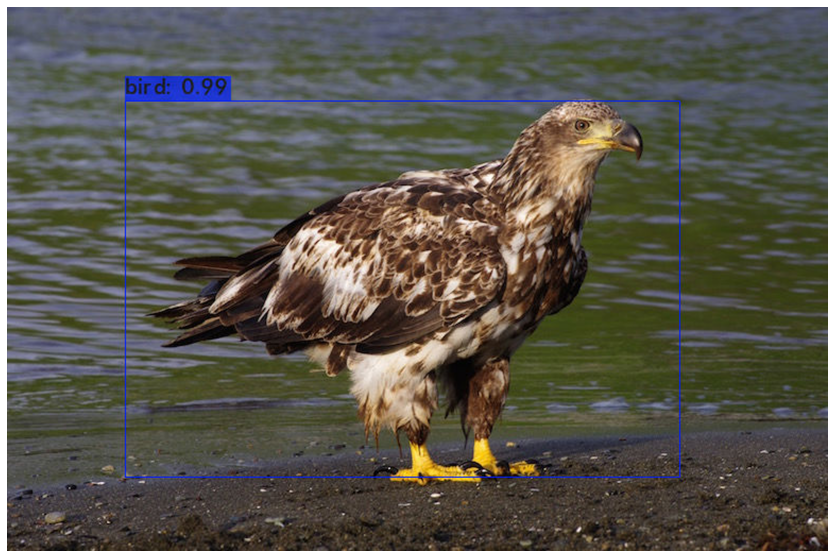

In [ ]:
# check if detector works
# run darknet detection
!./darknet detect cfg/yolov3.cfg /mydrive/yolov3/yolov3.weights data/eagle.jpg
imShow('predictions.jpg')

In [ ]:
    # copy the .zip file from mounted gdrive into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/
!mv "data/teeth - Copy" data/obj

Streaming output truncated to the last 5000 lines.
  inflating: data/teeth - Copy/49-Dental-carie1s.txt  
  inflating: data/teeth - Copy/49-Dental-caries.jpg  
  inflating: data/teeth - Copy/49-Dental-caries.txt  
  inflating: data/teeth - Copy/49-Dental_2Caries_.jpg  
  inflating: data/teeth - Copy/49-Dental_2Caries_.txt  
  inflating: data/teeth - Copy/49-dental_caries.jpg  
  inflating: data/teeth - Copy/49-dental_caries.txt  
  inflating: data/teeth - Copy/49-feae00d5-708b-4d76-912d-2f2f7104f160.jpg  
  inflating: data/teeth - Copy/49-feae00d5-708b-4d76-912d-2f2f7104f160.txt  
  inflating: data/teeth - Copy/49-IMG_20201028_171126205.jpg  
  inflating: data/teeth - Copy/49-IMG_20201028_171126205.txt  
  inflating: data/teeth - Copy/49-IMG_20201028_171204084.jpg  
  inflating: data/teeth - Copy/49-IMG_20201028_171204084.txt  
  inflating: data/teeth - Copy/49-IMG_20201028_171246957.jpg  
  inflating: data/teeth - Copy/49-IMG_20201028_171246957.txt  
  inflating: data/teeth - Copy/49-

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
# run this to create 'train.txt', used by darknet. It adds all the image filenames in a file 'train.txt'
!python generate_train.py

In [ ]:
# copy the pretrained darknet weights 
!cp  /mydrive/yolov3/darknet53.conv.74 ./

In [ ]:
# train your custom detector
# ensure  `cfg/yolov3_custom.cfg` file, change batch=64 and subdivision=16 for training
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

/bin/bash: ./darknet: No such file or directory


Resume Training (gdrive should be mounted, ln should have been done)

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

Prediction
in `cfg/yolov3_custom.cfg` file, change batch=1 and subdivision=1 for evaluation/prediction. 

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/IMG_20201030_122735030.jpg -thresh 0.3
imShow('predictions.jpg')

# Converting darknet weights to keras h5 (this and next steps can be done on local)

last `filter` in yolo_block has to be changed if the output classes differ. 
formula being: (5+no_class )*3 eg (5+2) * 3 = 21

this should be done in all 3 yolo blocks

In [ ]:
# create a YOLOv3 Keras model and save it to file
# based on https://github.com/experiencor/keras-yolo3
import struct
import cv2
import numpy as np
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model

def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x

def make_yolov3_model():
	input_image = Input(shape=(None, None, 3))
	# Layer  0 => 4
	x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
								  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
								  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
								  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
	# Layer  5 => 8
	x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
						{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
	# Layer  9 => 11
	x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
	# Layer 12 => 15
	x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
						{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
						{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
	# Layer 16 => 36
	for i in range(7):
		x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
							{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
	skip_36 = x
	# Layer 37 => 40
	x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
	# Layer 41 => 61
	for i in range(7):
		x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
							{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
	skip_61 = x
	# Layer 62 => 65
	x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
	# Layer 66 => 74
	for i in range(3):
		x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
							{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
	# Layer 75 => 79
	x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
	# Layer 80 => 82
	yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
							  {'filter':  21, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
	# Layer 83 => 86
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_61])
	# Layer 87 => 91
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
	# Layer 92 => 94
	yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
							  {'filter': 21, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
	# Layer 95 => 98
	x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_36])
	# Layer 99 => 106
	yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
							   {'filter': 21, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
	model = Model(input_image, [yolo_82, yolo_94, yolo_106])
	return model

class WeightReader:
	def __init__(self, weight_file):
		with open(weight_file, 'rb') as w_f:
			major,	= struct.unpack('i', w_f.read(4))
			minor,	= struct.unpack('i', w_f.read(4))
			revision, = struct.unpack('i', w_f.read(4))
			if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
				w_f.read(8)
			else:
				w_f.read(4)
			transpose = (major > 1000) or (minor > 1000)
			binary = w_f.read()
		self.offset = 0
		self.all_weights = np.frombuffer(binary, dtype='float32')

	def read_bytes(self, size):
		self.offset = self.offset + size
		return self.all_weights[self.offset-size:self.offset]

	def load_weights(self, model):
		for i in range(106):
			try:
				conv_layer = model.get_layer('conv_' + str(i))
				print("loading weights of convolution #" + str(i))
				if i not in [81, 93, 105]:
					norm_layer = model.get_layer('bnorm_' + str(i))
					size = np.prod(norm_layer.get_weights()[0].shape)
					beta  = self.read_bytes(size) # bias
					gamma = self.read_bytes(size) # scale
					mean  = self.read_bytes(size) # mean
					var   = self.read_bytes(size) # variance
					weights = norm_layer.set_weights([gamma, beta, mean, var])
				if len(conv_layer.get_weights()) > 1:
					bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel, bias])
				else:
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel])
			except ValueError:
				print("no convolution #" + str(i))

	def reset(self):
		self.offset = 0

# define the model
model = make_yolov3_model()
# load the model weights
weight_reader = WeightReader('/mydrive/yolov3/backup/yolov3_custom_last.weights')
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('caries_yolov3model.h5')

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [ ]:
# checking if model works
model = make_yolov3_model()
out = model.predict(np.random.rand(5,416,416,3))
print(len(out))
[x.shape for x in out]


3


[(5, 13, 13, 21), (5, 26, 26, 21), (5, 52, 52, 21)]

# Check yolov3 keras model works

In [ ]:
import numpy as np
from numpy import expand_dims
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle
 
class BoundBox:
	def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
		self.xmin = xmin
		self.ymin = ymin
		self.xmax = xmax
		self.ymax = ymax
		self.objness = objness
		self.classes = classes
		self.label = -1
		self.score = -1
 
	def get_label(self):
		if self.label == -1:
			self.label = np.argmax(self.classes)
 
		return self.label
 
	def get_score(self):
		if self.score == -1:
			self.score = self.classes[self.get_label()]
 
		return self.score
 
def _sigmoid(x):
	return 1. / (1. + np.exp(-x))
 
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
	grid_h, grid_w = netout.shape[:2]
	nb_box = 3
	netout = netout.reshape((grid_h, grid_w, nb_box, -1))
	nb_class = netout.shape[-1] - 5
	boxes = []
	netout[..., :2]  = _sigmoid(netout[..., :2])
	netout[..., 4:]  = _sigmoid(netout[..., 4:])
	netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
	netout[..., 5:] *= netout[..., 5:] > obj_thresh
 
	for i in range(grid_h*grid_w):
		row = i / grid_w
		col = i % grid_w
		for b in range(nb_box):
			# 4th element is objectness score
			objectness = netout[int(row)][int(col)][b][4]
			if(objectness.all() <= obj_thresh): continue
			# first 4 elements are x, y, w, and h
			x, y, w, h = netout[int(row)][int(col)][b][:4]
			x = (col + x) / grid_w # center position, unit: image width
			y = (row + y) / grid_h # center position, unit: image height
			w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
			h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
			# last elements are class probabilities
			classes = netout[int(row)][col][b][5:]
			box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
			boxes.append(box)
	return boxes
 
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
	new_w, new_h = net_w, net_h
	for i in range(len(boxes)):
		x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
		y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
		boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
		boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
		boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
		boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)
 
def _interval_overlap(interval_a, interval_b):
	x1, x2 = interval_a
	x3, x4 = interval_b
	if x3 < x1:
		if x4 < x1:
			return 0
		else:
			return min(x2,x4) - x1
	else:
		if x2 < x3:
			 return 0
		else:
			return min(x2,x4) - x3
 
def bbox_iou(box1, box2):
	intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
	intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
	intersect = intersect_w * intersect_h
	w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
	w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
	union = w1*h1 + w2*h2 - intersect
	return float(intersect) / union
 
def do_nms(boxes, nms_thresh):
	if len(boxes) > 0:
		nb_class = len(boxes[0].classes)
	else:
		return
	for c in range(nb_class):
		sorted_indices = np.argsort([-box.classes[c] for box in boxes])
		for i in range(len(sorted_indices)):
			index_i = sorted_indices[i]
			if boxes[index_i].classes[c] == 0: continue
			for j in range(i+1, len(sorted_indices)):
				index_j = sorted_indices[j]
				if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
					boxes[index_j].classes[c] = 0
 
# load and prepare an image
def load_image_pixels(filename, shape):
	# load the image to get its shape
	image = load_img(filename)
	width, height = image.size
	# load the image with the required size
	image = load_img(filename, target_size=shape)
	# convert to numpy array
	image = img_to_array(image)
	# scale pixel values to [0, 1]
	image = image.astype('float32')
	image /= 255.0
	# add a dimension so that we have one sample
	image = expand_dims(image, 0)
	return image, width, height
 
# get all of the results above a threshold
def get_boxes(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	# enumerate all boxes
	for box in boxes:
		# enumerate all possible labels
		for i in range(len(labels)):
			# check if the threshold for this label is high enough
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)
				# don't break, many labels may trigger for one box
	return v_boxes, v_labels, v_scores
 
# draw all results
def draw_boxes(filename, v_boxes, v_labels, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%s (%.3f)" % (v_labels[i], v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()
 
# load yolov3 model
model = load_model('caries_yolov3model.h5')

[(1, 13, 13, 21), (1, 26, 26, 21), (1, 52, 52, 21)]
caries 99.74039793014526
caries 99.58335161209106
healthy 98.99876713752747
healthy 99.6458113193512
healthy 98.02578091621399


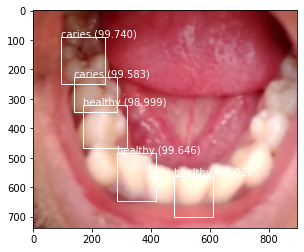

In [ ]:
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = '/mydrive/yolov3/IMG_20201030_122735030.jpg'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
# suppress non-maximal boxes
do_nms(boxes, 0.5)
# define the labels
labels = ["caries", "healthy"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
# summarize what we found
for i in range(len(v_boxes)):
	print(v_labels[i], v_scores[i])
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

In [ ]:
# don't run again already images copied in images folder
#!unzip /mydrive/yolov3/obj.zip -d /mydrive/yolov3/images   

In [ ]:
from glob import glob

In [26]:
a = (glob('/mydrive/yolov3/images/teeth - Copy/*.jpg') + 
     glob('/mydrive/yolov3/images/teeth - Copy/*.jpeg') + 
     glob('/mydrive/yolov3/images/teeth - Copy/*.png'))
len(a)

8895

In [27]:
def get_box(filename):
    "pass in a file name to get the bounding boxes (as per the manual labeling done)"
    import cv2
    txt_file = ''.join(filename.split('.')[:-1]) + '.txt'
    yolo = [list(map(float,x.split())) for x in open(txt_file).readlines()]
    img = cv2.imread(filename)
    img_h, img_w,_ = img.shape
    out = []
    for bbox in yolo:
        ls = []
        ls.append(int(bbox[0]))
        x_mid = img_w*bbox[1]
        y_mid = img_h*bbox[2]
        width = img_w*bbox[3]
        height = img_h*bbox[4]
        xmin, ymin, xmax, ymax = x_mid - width/2, y_mid - height/2, x_mid + width/2, y_mid + height/2
        ls.append(BoundBox(int(xmin), int(ymin), int(xmax), int(ymax), classes = int(bbox[0])))
        out.append(ls)
    return img, out
    

In [28]:
img, out = get_box(a[2])
out

[[1, <__main__.BoundBox at 0x7f0ae612a6a0>],
 [1, <__main__.BoundBox at 0x7f0ae612a6d8>],
 [1, <__main__.BoundBox at 0x7f0ae612a860>],
 [1, <__main__.BoundBox at 0x7f0ae6169828>],
 [1, <__main__.BoundBox at 0x7f0ae61695f8>],
 [1, <__main__.BoundBox at 0x7f0ae6169470>],
 [1, <__main__.BoundBox at 0x7f0ae61696d8>],
 [1, <__main__.BoundBox at 0x7f0ae6169860>],
 [1, <__main__.BoundBox at 0x7f0ae6169f28>]]

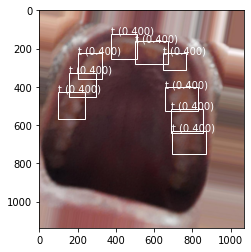

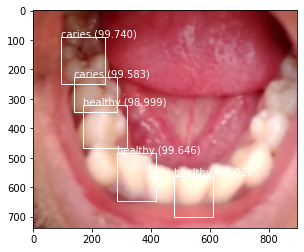

In [29]:
# check if previous functions works well
i = 23
vboxes = [x[1] for x in get_box(a[i])[1]]
draw_boxes(a[i], vboxes, 't'*len(vboxes), [.4]*len(vboxes))
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

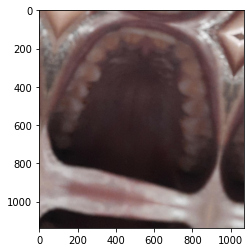

In [30]:
bbox = out[0][1]
img = pyplot.imread(a[2])
pyplot.imshow(img)

In [31]:
bbox_iou(out[1][1], v_boxes[1])

0.0

In [32]:
def get_preds_save_cropped(filename):
    image, image_w, image_h = load_image_pixels(filename, (416, 416))
    img = pyplot.imread(filename)
    # make prediction
    yhat = model.predict(image)
    # define the anchors
    anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
    # define the probability threshold for detected objects
    class_threshold = 0.6
    boxes = list()
    for i in range(len(yhat)):
        # decode the output of the network
        boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
    # correct the sizes of the bounding boxes for the shape of the image
    correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
    # suppress non-maximal boxes
    do_nms(boxes, 0.5)
    # define the labels
    labels = ["caries", "healthy"]
    # get the details of the detected objects
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
    print('len vbox', len(v_boxes))
    try:
        for i, pred_box in enumerate(v_boxes):
    #         print(get_box(filename))
            #print(i)
            for tgt,tgt_box in get_box(filename)[1]:
                # compare predicted bounding box and labeled bounding box
                # if iou is greater than 0.3, we crop the image, and save it in directory
                # directory name that of labeled bounding box class
                if bbox_iou(pred_box, tgt_box) > 0.3:
                    try:
                        pyplot.imsave(f'/mydrive/yolov3/data/train/{str(tgt)}/{str(i) + "_" + filename.split("/")[-1]}', 
                                 img[pred_box.ymin-4:pred_box.ymax+4,
                                     pred_box.xmin-4:pred_box.xmax+4,:]
                                 )
                    except:
                        pyplot.imsave(f'/mydrive/yolov3/data/train/{str(tgt)}/{str(i) + "_" + filename.split("/")[-1]}', 
                                 img[pred_box.ymin:pred_box.ymax,
                                     pred_box.xmin:pred_box.xmax,:]
                                 )
                        
    except BaseException as e:
        print(filename, e)
        print(repr(e))

In [ ]:
# save cropped images  (Run onces only)


#[get_preds_save_cropped(x) for x in a]
#"."

In [36]:
print('class 0 files: ', len(glob('/mydrive/yolov3/data/train/0/*')) )
print('class 1 files: ', len(glob('/mydrive/yolov3/data/train/1/*')) )

class 0 files:  19007
class 1 files:  39459


# Train Classifier on cropped images

In [37]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import numpy as np

In [38]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
    
def get_data(preproc_fn,image_size ):
    data_gen = keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function = preproc_fn,
        rotation_range=20,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True, validation_split=0.2)
    train_batches = data_gen.flow_from_directory('/mydrive/yolov3/data/train',batch_size=128,target_size= image_size,subset='training')
    val_batches = data_gen.flow_from_directory('/mydrive/yolov3/data/train',batch_size=512,target_size= image_size,subset='validation')
#     val_X, val_y = list(keras.preprocessing.image_dataset_from_directory('data/valid', label_mode='int', image_size=image_size))[0]
#     val_X /= 255
#     val_y = np.array(val_y)
#     val_y[val_y==3] = 2
#     val_y = keras.utils.to_categorical(val_y)
#     test_X,test_y = list(keras.preprocessing.image_dataset_from_directory('data/test', image_size=image_size))[0]
#     test_X /= 255
#     test_y = np.array(test_y)
#     test_y[test_y==3] = 2
#     test_y = keras.utils.to_categorical(test_y)
    return train_batches, val_batches#, val_y, test_X, test_y

In [39]:
58457//128

456

In [40]:
## Delete 0 KB files from the 0 & 1 folders

!find '/mydrive/yolov3/data/train/1/' -name '*' -size 0 -print0 | xargs -0 rm
!find '/mydrive/yolov3/data/train/0/' -name '*' -size 0 -print0 | xargs -0 rm

rm: missing operand
Try 'rm --help' for more information.
rm: missing operand
Try 'rm --help' for more information.


In [46]:
#reset_random_seeds()
Res_Net = keras.applications.ResNet50V2()
x = Res_Net.layers[-2].output


output = Dense(2,activation='softmax')(x)
Res_Net = Model(inputs = Res_Net.input, outputs = output)

for layer in Res_Net.layers[:-30]:
    layer.trainable = False

train_batches,val_batches = get_data(keras.applications.resnet_v2.preprocess_input,(28,28))
Res_Net.compile(loss='binary_crossentropy', metrics=['accuracy'])

Found 46774 images belonging to 2 classes.
Found 11692 images belonging to 2 classes.


In [ ]:

Res_Net.fit(
    train_batches,
    steps_per_epoch = 365,
    epochs = 5,
    validation_data= val_batches,
)


Epoch 1/5
189/365 [==============>...............] - ETA: 1:02:31 - loss: 0.5291 - accuracy: 0.7608

In [ ]:
mob_net.save('cropped_tooth_caries_classifier_resnet50.h5')